# MAS DSE 200: Mini Project - Thanya Kunghae
## Seaborn - Bigfoot Sightings
### Please access the datasets [here](https://data.world/timothyrenner/bfro-sightings-data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###  Load Dataset 

In [2]:
df = pd.read_csv('bfro_reports_geocoded.csv', 
                 usecols=['county', 'state', 'season', 'title', 'latitude', 'longitude', 
                          'date', 'number', 'classification', 'temperature_high', 
                          'temperature_mid', 'temperature_low', 'dew_point','humidity', 
                          'cloud_cover', 'moon_phase','pressure', 'summary', 
                          'conditions', 'visibility', 'wind_bearing', 'wind_speed'])

### Get Datasets Information and Statistics

In [3]:
df.head()

,county,state,season,title,latitude,longitude,date,number,classification,temperature_high,...,dew_point,humidity,cloud_cover,moon_phase,pressure,summary,conditions,visibility,wind_bearing,wind_speed
0,Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,Class B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,Class A,37.8,...,17.5,61.7,66.7,0.07,1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",9.3,168.1,17.1
2,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,Class A,64.3,...,49.3,90.6,100.0,0.19,1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",5.0,356.2,7.6
3,Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,Class A,59.0,...,28.1,49.2,76.2,0.25,1020.9,Partly cloudy throughout the day.,Partially cloudy,13.0,107.3,11.5
4,Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,Class A,75.3,...,58.6,64.7,52.9,0.43,NaN,Partly cloudy throughout the day.,Partially cloudy,10.5,180.4,20.8


In [4]:
print(f" Dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

 Dimensions: 5082 rows and 22 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            5082 non-null   object 
 1   state             5082 non-null   object 
 2   season            5082 non-null   object 
 3   title             4104 non-null   object 
 4   latitude          4104 non-null   float64
 5   longitude         4104 non-null   float64
 6   date              4104 non-null   object 
 7   number            5082 non-null   float64
 8   classification    5082 non-null   object 
 9   temperature_high  4102 non-null   float64
 10  temperature_mid   3964 non-null   float64
 11  temperature_low   4102 non-null   float64
 12  dew_point         3951 non-null   float64
 13  humidity          3951 non-null   float64
 14  cloud_cover       3939 non-null   float64
 15  moon_phase        4104 non-null   float64
 16  pressure          3678 non-null   float64


### Handling Missing Values and Clean Data

In [6]:
df.isna().sum()

county                 0
state                  0
season                 0
title                978
latitude             978
longitude            978
date                 978
number                 0
classification         0
temperature_high     980
temperature_mid     1118
temperature_low      980
dew_point           1131
humidity            1131
cloud_cover         1143
moon_phase           978
pressure            1404
summary             1118
conditions          1118
visibility          1166
wind_bearing        1127
wind_speed          1116
dtype: int64

In [7]:
df.dropna(inplace=True)   
df.isna().sum()

county              0
state               0
season              0
title               0
latitude            0
longitude           0
date                0
number              0
classification      0
temperature_high    0
temperature_mid     0
temperature_low     0
dew_point           0
humidity            0
cloud_cover         0
moon_phase          0
pressure            0
summary             0
conditions          0
visibility          0
wind_bearing        0
wind_speed          0
dtype: int64

In [8]:
print(f" Dimensions after removing null values: {df.shape[0]} rows and {df.shape[1]} columns")

 Dimensions after removing null values: 3659 rows and 22 columns


In [9]:
# Before dropping reports with Class C classification 
    # Class A is for reports with a clear visual sightings
    # Class B is for reports without a clear visual identification
    # Class C is for second-hand reports
df['classification'].value_counts()

classification
Class B    1828
Class A    1817
Class C      14
Name: count, dtype: int64

In [10]:
df = df[df.classification != 'Class C']

In [11]:
#After dropping reports with 'Class C' classification 
df['classification'].value_counts()

classification
Class B    1828
Class A    1817
Name: count, dtype: int64

In [12]:
#Before dropping reports with 'Unknown' season
df['season'].value_counts()

season
Summer     1342
Fall       1055
Spring      627
Winter      568
Unknown      53
Name: count, dtype: int64

In [13]:
df = df[df.season != 'Unknown']

In [14]:
#After dropping reports with 'Unknown' season
df['season'].value_counts()

season
Summer    1342
Fall      1055
Spring     627
Winter     568
Name: count, dtype: int64

In [15]:
#Convert data type of date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [16]:
print(f"Data type of the date column is now: {df.date.dtype}")

Data type of the date column is now: datetime64[ns]


In [17]:
#Get year, month, date from date column
df['year'] = df['date'].dt.year.astype(np.int64)
df['month'] = df['date'].dt.month.astype(np.int64)
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day.astype(np.int64)

### Data Visualization with Seaborn

#### [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- Using the sns.scatterplot function, you can easily visualize the relationship between two variables.

[Text(0.5, 1.0, 'Bigfoot sightings in USA'),
 Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude')]

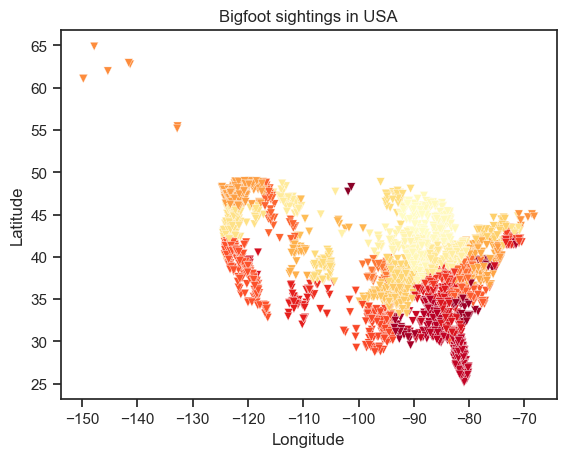

In [18]:
#Preparing data
sorted_temp = df.sort_values(by=['temperature_mid'])

#Plotting
sns.set_theme(style='ticks') #style={darkgrid, whitegrid, dark, white, ticks}
sns.scatterplot(x = 'longitude', 
                y = 'latitude', 
                data = sorted_temp,
                hue= 'state', #column that will produce points with different colors
                palette='YlOrRd',
                marker='v',
                legend = False, 
                linewidth = 0.25).set(title='Bigfoot sightings in USA', 
                                      xlabel='Longitude', 
                                      ylabel='Latitude')

#### [Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
- Seaborn's countplot is a categorical plot function that shows the distribution of a categorical variable by displaying the count of observations in each category. 

In [19]:
#Sorting data
df = df.sort_values(by=['month'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

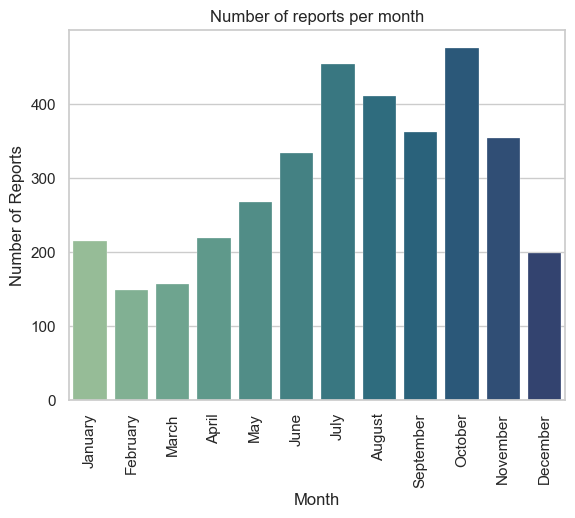

In [20]:
#Ploting
sns.set_theme(style='whitegrid')

sns.countplot(x='month_name', 
              data=df, 
              linewidth=0.2, 
              palette='crest').set(title='Number of reports per month', 
                                   xlabel='Month', 
                                   ylabel='Number of Reports')
plt.xticks(rotation=90) #Get or set the x-axis tick locations and labels.

#### [Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) 
- A Seaborn swarm plot is a categorical scatter plot that displays individual data points along the categorical axis, avoiding overlap by adjusting their positions based on the distribution of data. It is particularly useful for visualizing the distribution of a continuous variable within different categories. 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

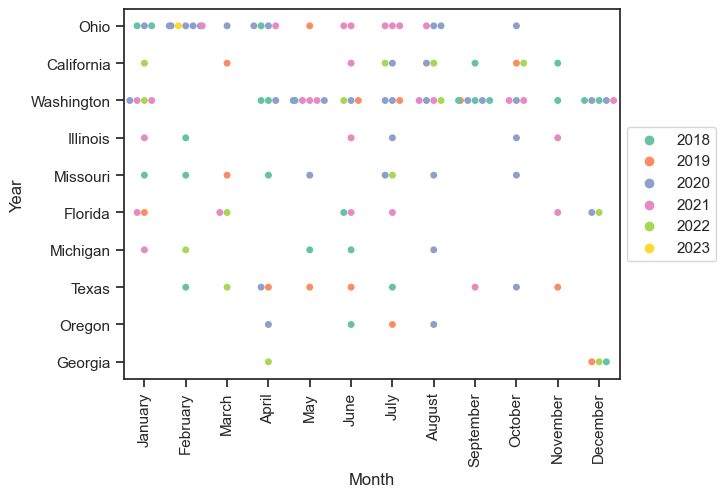

In [21]:
#Preparing data
top_10 = df['state'].value_counts()[:10]
top_10_df = df[df['state'].isin(list(top_10.index)) & (df['year'] > 2017)]

#Plotting
sns.set_theme(style='ticks')

sns.swarmplot(x='month_name', 
              y='state', 
              hue='year', 
              data=top_10_df, 
              palette='Set2').set(xlabel='Month', 
                                  ylabel='Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

#### [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) 
- Seaborn's FacetGrid is a powerful tool for creating multi-plot grids, allowing users to visualize relationships in their data across different subsets. By using the FacetGrid along with Seaborn's plotting functions, users can efficiently generate a grid of customized visualizations for deeper insights into complex, multidimensional datasets.



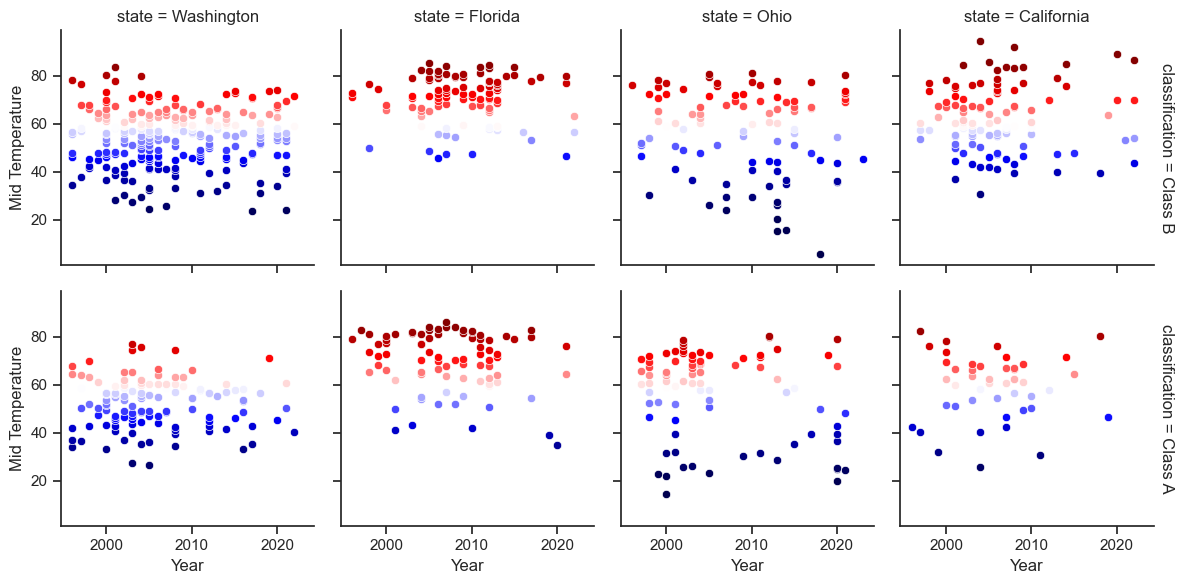

In [22]:
#Preparing data 
top_4 = df['state'].value_counts()[:4]
top_4_df = df[df['state'].isin(list(top_4.index)) & (df['year'] > 1995)]
top_4_df = top_4_df[top_4_df.classification != 'Class C']
top_4_df = top_4_df[top_4_df.season != 'Unknown']

#Initialize the FacetGrid object with the dataset and the variables that are used to structure the grid
g = sns.FacetGrid(top_4_df, 
                  col='state', 
                  row='classification', 
                  margin_titles=True, #titles for the row variable 
                  hue='temperature_mid',
                  palette='seismic')

g.map(sns.scatterplot, 'year', 'temperature_mid').set(xlabel='Year' ,
                                                      ylabel='Mid Temperature')

#### [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- Seaborn's jointplot is a function for visualizing the relationship between two variables, providing a scatter plot by default with histograms on the margins. It allows users to explore the distribution and correlation of data points in a bivariate context, with options to customize the central plot, choose different types of regression fits, and display kernel density estimates. 

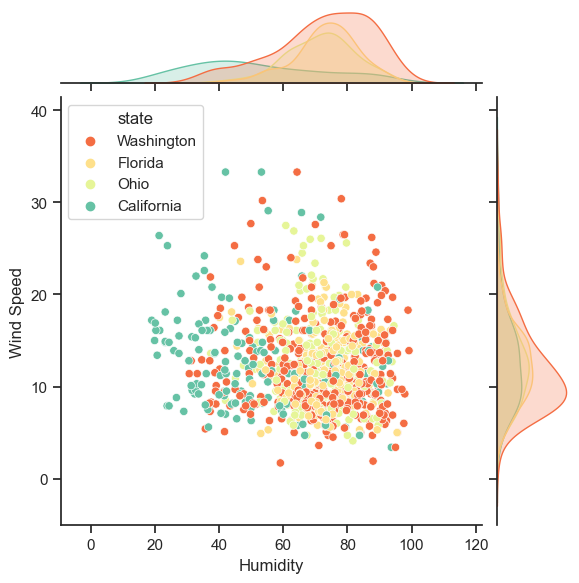

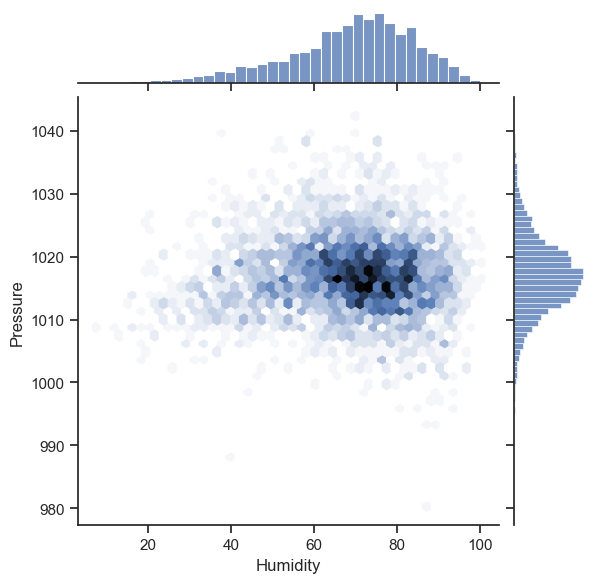

In [23]:
sns.set_theme(style='ticks')

j = sns.jointplot(data=top_4_df, 
                  x='humidity', 
                  y='wind_speed', 
                  kind='scatter',
                  hue='state',
                  palette='Spectral')
j.set_axis_labels('Humidity', 'Wind Speed')

k = sns.jointplot(data=df, 
                  x='humidity', 
                  y='pressure', 
                  kind='hex')
k.set_axis_labels('Humidity', 'Pressure')

## Homework

Create a joint plot to visualize the relationship between high temperature and humidity that was reported for the top 3 states using Seaborn jointplot
- The x-axis is Temperature
- The y-axis is Humidity
- Be creative with color (hint: look at palette attribute)

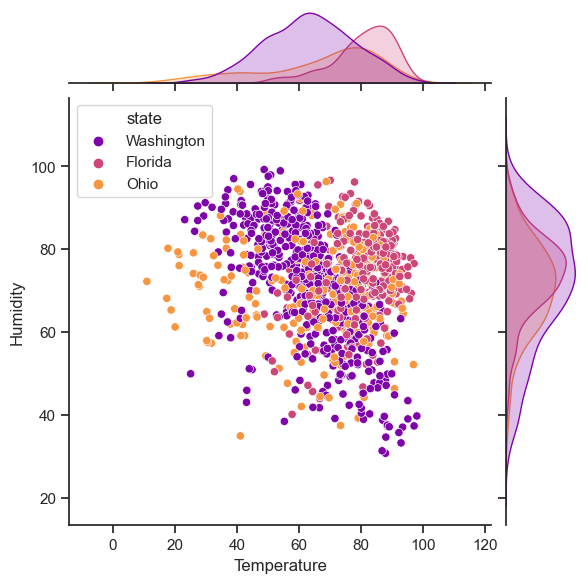

In [24]:
top_3 = df['state'].value_counts()[:3]
top_3_df = df[df['state'].isin(list(top_3.index))]

l = sns.jointplot(data=top_3_df, 
                  x='temperature_high', 
                  y='humidity', 
                  kind='scatter',
                  hue='state',
                  palette='plasma')
l.set_axis_labels('Temperature', 'Humidity')
